In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
# Import as Dataframe
df = pd.read_csv('/content/revenue_and_employees_24_months.csv')

In [3]:
# Import as Dataframe
df1 = pd.read_csv('/content/inventory_purchase.csv')

In [4]:
item_counts = df["store_id"].value_counts()
item_counts

1975    24
6993    24
8622    24
6593    24
546     24
        ..
4711    24
6782    24
685     24
4831    24
4106    24
Name: store_id, Length: 446, dtype: int64

In [5]:
emp_counts = df["employess"].sum()
emp_counts

26493

In [6]:
df.columns

Index(['year', 'month', 'store_id', 'earning', 'employess', 'country',
       'current_working_status'],
      dtype='object')

In [7]:
df1.columns

Index(['year', 'month', 'store_id', 'country', 'purchase_expense'], dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of        year  month  store_id  ...  employess    country current_working_status
0      2019      1        38  ...          6  Australia                      1
1      2019      2        38  ...          5  Australia                      1
2      2019      3        38  ...          5  Australia                      1
3      2019      4        38  ...          5  Australia                      1
4      2019      5        38  ...          3  Australia                      1
...     ...    ...       ...  ...        ...        ...                    ...
10699  2020      8     15960  ...          1     Canada                      1
10700  2020      9     15960  ...          1     Canada                      1
10701  2020     10     15960  ...          1     Canada                      1
10702  2020     11     15960  ...          3     Canada                      1
10703  2020     12     15960  ...          4     Canada                      1

[10704 rows x 7 c

In [9]:
def merge_column_year_month(df):
    df['date'] = df['year'].map(str)+ '-' +df['month'].map(str)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m').dt.strftime('%Y-%m')
    df = df.sort_values(by = 'date')
    return df

In [10]:
df = merge_column_year_month(df)
df.head()

,year,month,store_id,earning,employess,country,current_working_status,date
0,2019,1,38,55114.87,6,Australia,1,2019-01
5040,2019,1,5088,35198.34,3,United States,1,2019-01
5016,2019,1,5083,29082.78,5,United States,1,2019-01
4992,2019,1,5076,17934.66,1,United States,1,2019-01
480,2019,1,652,59767.02,10,Australia,1,2019-01


In [11]:
df_months_employee=df.groupby([df['country']]).agg({'earning':'sum'})
df_months_employee.head(24)

,earning
country,
Australia,9.727881e+07
Brunei Darussalam,6.711820e+06
Canada,2.305659e+07
Denmark,1.562025e+07
Ecuador,2.617739e+05
Fiji,2.514394e+07
France,9.482347e+05
Germany,2.887184e+06
Ghana,2.744670e+06


In [12]:
res=df.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
res.head().sum()

earning    2.798306e+09
dtype: float64

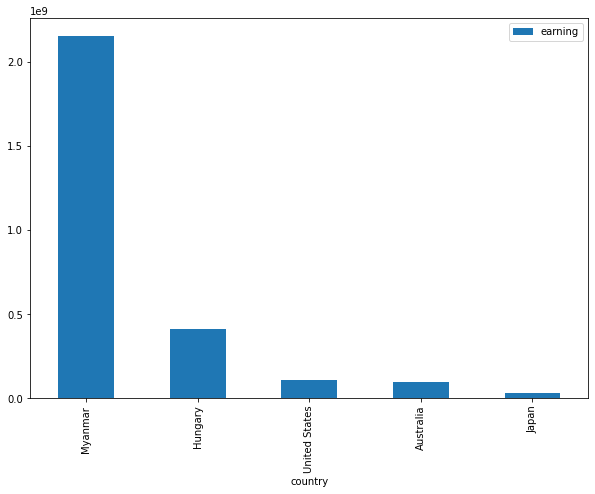

In [13]:
df.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5)).plot(kind='bar',figsize=(10,7))

In [14]:
# Seprate Data 2019 and 2020
year_data = df.groupby('year')
year_data1 = df1.groupby('year')

# Store 2019 Data new Variable
data_19 =year_data.get_group(2019)
purch_19=year_data1.get_group(2019)

# Store 2020 Data new Variable
data_20 =year_data.get_group(2020)
purch_20=year_data1.get_group(2020)

In [15]:
data_19

,year,month,store_id,earning,employess,country,current_working_status,date
0,2019,1,38,55114.87,6,Australia,1,2019-01
5040,2019,1,5088,35198.34,3,United States,1,2019-01
5016,2019,1,5083,29082.78,5,United States,1,2019-01
4992,2019,1,5076,17934.66,1,United States,1,2019-01
480,2019,1,652,59767.02,10,Australia,1,2019-01
...,...,...,...,...,...,...,...,...
1067,2019,12,1360,168569.17,4,New Zealand,1,2019-12
10355,2019,12,11775,78114.96,4,Canada,1,2019-12
5051,2019,12,5088,38866.01,2,United States,1,2019-12
9467,2019,12,7973,37440.00,3,Mexico,1,2019-12


In [16]:
data_20

,year,month,store_id,earning,employess,country,current_working_status,date
6132,2020,1,5863,13848.80,1,United States,1,2020-01
6468,2020,1,6139,49812.99,1,United States,1,2020-01
7068,2020,1,6471,39323.65,4,Australia,1,2020-01
6324,2020,1,5986,22084.27,5,United States,1,2020-01
5580,2020,1,5330,74047.00,1,Australia,1,2020-01
...,...,...,...,...,...,...,...,...
6959,2020,12,6379,136016.46,5,Fiji,1,2020-12
6983,2020,12,6380,85630.86,2,Fiji,1,2020-12
7007,2020,12,6397,42533.60,2,Australia,1,2020-12
7055,2020,12,6421,50689.81,4,Fiji,1,2020-12


#Top 5 Countries Interm of Reveneu 2019

Text(0, 0.5, 'Reveneue 2019')

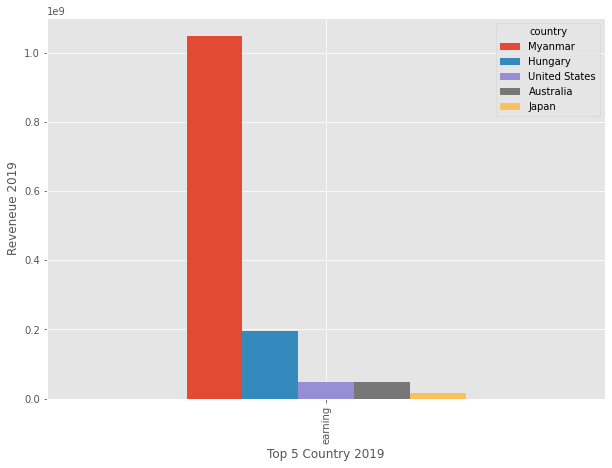

In [17]:
# Get  Revenue of Top 5 Country in 2019
data=data_19.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2019')
plt.ylabel('Reveneue 2019')

#Top 5 Countries Interm of Reveneu 2020

Text(0, 0.5, 'Reveneu 2020')

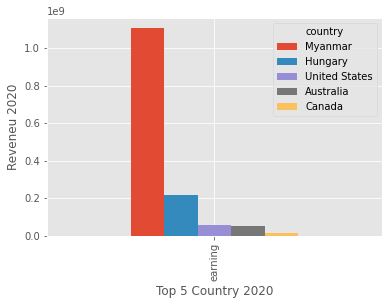

In [18]:
# Get  Revenue of Top 5 Country in 2020
data=data_20.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xlabel('Top 5 Country 2020')
plt.ylabel('Reveneu 2020')

#Top 5 Countries Interm of Employess 2019

Text(0, 0.5, 'Employess 2019 ')

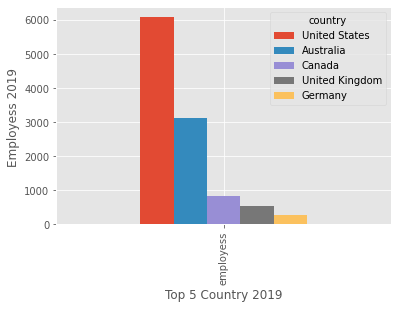

In [19]:
# Get Num of Employee of Top 5 Country 2019
data=data_19.groupby('country').agg({'employess':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xlabel('Top 5 Country 2019')
plt.ylabel('Employess 2019 ')

#Top 5 Countries Interm of Emplyess 2020

Text(0, 0.5, 'Employess 2020')

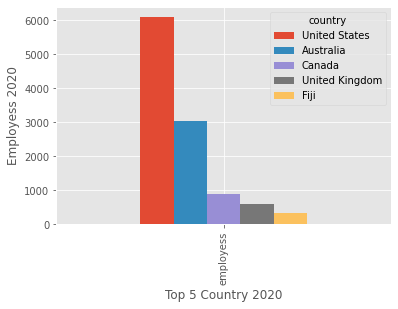

In [20]:
# Get Num of Employee of Top 5 Country 2020
data=data_20.groupby('country').agg({'employess':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xlabel('Top 5 Country 2020')
plt.ylabel('Employess 2020')

#Top 5 Countries Interm of Purchase Expense 2019

Text(0, 0.5, 'Purchase Expense 2019 ')

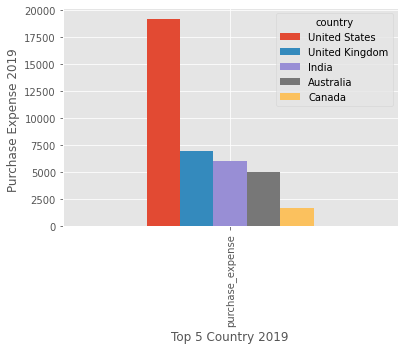

In [21]:
# Get  Purchase Expense of Top 5 Country 2019
data=purch_19.groupby('country').agg({'purchase_expense':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xlabel('Top 5 Country 2019')
plt.ylabel('Purchase Expense 2019 ')

#Top 5 Countries Interm of Purchase Expense 2020

Text(0, 0.5, 'Purchase Expense 2020')

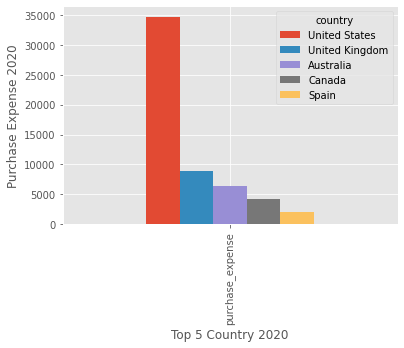

In [22]:
# Get  Pujrchase Expense of Top 5 Country 2020
data=purch_20.groupby('country').agg({'purchase_expense':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xlabel('Top 5 Country 2020')
plt.ylabel('Purchase Expense 2020')

In [24]:
!pip install joypy
import joypy

In [ ]:
# Import Data
mpg = pd.read_csv("/content/revenue_and_employees_24_months.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)

fig, axes = joypy.joyplot(mpg, column=['country', 'earning'], by="year", ylim='own', figsize=(14,10))

# Decoration
plt.title('Data Representaion by Yearly', fontsize=22)
plt.show()

In [ ]:
# Import Data


# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)

fig, axes = joypy.joyplot(data,ylim='own', figsize=(14,10))

# Decoration
plt.title('Data Representaion by Yearly', fontsize=22)
plt.show()